# Mutual Information

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv("pre_selected_new_M.csv", low_memory=False)

In [46]:
X = data.drop(['label'], axis=1)
y = data['label']

In [47]:
X.columns

Index(['56465M', '227244M', '961762M', '1063954M', '1129626M', '1414255M',
       '1496095M', '1703514M', '1901703M', '2011430M', '2097787M', '2101220M',
       '2283913M', '2294662M', '2348404M', '2371202M', '2786568M', '2858295M',
       '2933949M', '2988237M'],
      dtype='object')

['56465', '227244', '961762', '1063954', '1129626', '1414255', '1496095', '1703514', '1901703', '2011430', '2097787', '2101220', '2283913', '2294662', '2348404', '2371202', '2786568', '2858295', '2933949', '2988237']

Sequence the importance of each feature


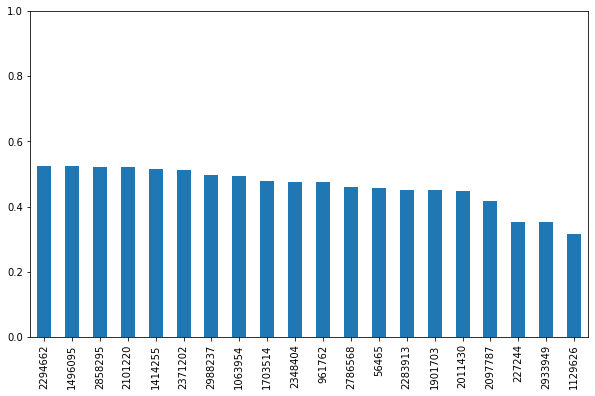

In [48]:
# import necessary libraries
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(score_func=mutual_info_classif, k=20)



X_selected = fs.fit_transform(X, y)

lst = [words[:-1] for words in fs.get_feature_names_out()]
print(lst)

X_selected = pd.DataFrame(X_selected, columns=lst)

print("\nSequence the importance of each feature")
fs.fit(X_selected,y)
mi_score = pd.Series(fs.scores_, index=X_selected.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(10, 6))
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

In [22]:
X_selected.sample(5)

,56465M,227244M,961762M,1063954M,1129626M,1414255M,1496095M,1703514M,1901703M,2011430M,2097787M,2101220M,2283913M,2294662M,2348404M,2371202M,2786568M,2858295M,2933949M,2988237M
21,0.290323,0.571429,0.200000,0.25,0.25,0.173913,0.142857,0.200000,0.333333,0.103448,0.147059,0.318182,0.250000,0.258065,0.5,0.166667,0.2500,0.296296,0.230769,0.200000
20,0.258065,0.714286,0.133333,0.10,0.25,0.173913,0.107143,0.066667,0.000000,0.103448,0.058824,0.272727,0.125000,0.225806,0.2,0.166667,0.3125,0.111111,0.076923,0.171429
3,0.064516,0.000000,0.066667,0.15,1.00,0.086957,0.160714,0.100000,0.333333,0.241379,0.205882,0.227273,0.166667,0.161290,0.3,0.111111,0.0000,0.111111,0.076923,0.085714
34,0.451613,0.142857,0.133333,0.25,0.25,0.282609,0.410714,0.233333,0.333333,0.103448,0.352941,0.318182,0.250000,0.258065,0.8,0.277778,0.2500,0.222222,0.076923,0.371429
6,0.096774,0.000000,0.066667,0.10,0.00,0.000000,0.017857,0.033333,0.000000,0.000000,0.029412,0.090909,0.041667,0.096774,0.1,0.000000,0.0000,0.074074,0.000000,0.028571


In [23]:
X_selected['label'] = y

In [24]:
X_selected.columns

Index(['56465M', '227244M', '961762M', '1063954M', '1129626M', '1414255M',
       '1496095M', '1703514M', '1901703M', '2011430M', '2097787M', '2101220M',
       '2283913M', '2294662M', '2348404M', '2371202M', '2786568M', '2858295M',
       '2933949M', '2988237M', 'label'],
      dtype='object')

In [25]:
X_selected.to_csv("./dataset_with_20_features/2/selected_M.csv", encoding='utf-8', index=False)

# Forward feature selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
# Read data
df = pd.read_csv("pre_selection_F.csv", low_memory=False)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df.values[:,:-1],df.values[:,-1:],test_size=0.20,random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

In [ ]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs = SequentialFeatureSelector(clf, k_features=5, forward=True, floating=False, verbose=2, scoring='accuracy', cv=5)

# Perform SFFS
sfs = sfs.fit(X_train, y_train)

In [ ]:
# Which features?
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

In [ ]:
# Build full model with selected features
clf = RandomForestClassifier(n_estimators=100, max_depth=4)
clf.fit(X_train[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train[:, feat_cols])
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = clf.predict(X_test[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))